In [25]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [26]:
#Case 10A: k = 1e-14 || CO2 injection at 380°C (&42MPa) + H2O in the reservoir || 400m Well Spacing || m_flux_CO2 = 6

In [27]:
k_CO2_1em14 = pd.read_csv('CO2_10A_csv.csv')
#Energy production in Joules (bc. h_w or h_g is in kJ/kg)
k_CO2_1em14["Energy Production at this timestep"] = (k_CO2_1em14.mass_kg_h2o_extracted_this_timestep * k_CO2_1em14.h_w)*1000
k_CO2_1em14["Cumulative Energy Produced"] = k_CO2_1em14["Energy Production at this timestep"].cumsum()
k_CO2_1em14["Cumulative Produced CO2"] = k_CO2_1em14["mass_kg_co2_extracted_this_timestep"].cumsum()
# Injected CO2: time * mass flow CO2
k_CO2_1em14["Injected CO2 [kg]"] = k_CO2_1em14["time"]*6
#Conversion to kilotons
k_CO2_1em14["Injected CO2 [kt]"] = k_CO2_1em14["Injected CO2 [kg]"]*1e-6
#
#MW produced:
k_CO2_1em14["MW"] = (k_CO2_1em14["Cumulative Energy Produced"]/1e6)/k_CO2_1em14["time"]

#Stored CO2:
# = Injected CO2 - produced CO2 [kg]
k_CO2_1em14["Stored CO2 [kt]"] = (k_CO2_1em14["Injected CO2 [kg]"] - k_CO2_1em14["mass_kg_co2_extracted_this_timestep"])*1e-6

k_CO2_1em14["Time [y]"] = k_CO2_1em14["time"]/3.154E7
k_CO2_1em14.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_CO2_1em14

,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,...,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,Cumulative Produced CO2,Injected CO2 [kg],Injected CO2 [kt],MW,Stored CO2 [kt],Time [y]
0,0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0.0000,NaN,0.000000,0.000000
1,86400,0.000000e+00,1.000000,457718.284758,3.064764e+06,0.000000e+00,1.427155e+10,0.000000,4644.920612,0.000038,...,121.307965,772.588496,1.423558e+13,1.423558e+13,0.000000,518400,0.5184,164.763710,0.518400,0.002739
2,259200,0.000000e+00,1.000000,457614.306069,3.066606e+06,0.000000e+00,2.437642e+10,0.000000,7934.300760,0.000038,...,120.543582,772.216814,2.433138e+13,3.856696e+13,0.000000,1555200,1.5552,148.792284,1.555200,0.008218
3,604800,0.000000e+00,1.000000,457434.959019,3.067219e+06,0.000000e+00,4.439378e+10,0.000000,14455.576456,0.000038,...,120.157640,771.769342,4.433842e+13,8.290538e+13,0.000000,3628800,3.6288,137.079004,3.628800,0.019176
4,1296000,0.000000e+00,1.000000,457226.174274,3.067521e+06,0.000000e+00,8.154987e+10,0.000000,26566.550037,0.000038,...,119.858222,771.312526,8.149344e+13,1.643988e+14,0.000000,7776000,7.7760,126.850943,7.776000,0.041091
5,2678400,0.000000e+00,1.000000,457047.115751,3.067989e+06,0.000000e+00,1.476667e+11,0.000000,48118.343199,0.000038,...,119.525768,770.977809,1.476265e+14,3.120254e+14,0.000000,16070400,16.0704,116.496928,16.070400,0.084921
6,5443200,0.000000e+00,1.000000,456940.521007,3.068882e+06,0.000000e+00,2.594650e+11,0.000000,84542.989911,0.000038,...,119.106121,770.849754,2.594524e+14,5.714778e+14,0.000000,32659200,32.6592,104.989312,32.659200,0.172581
7,10972800,0.000000e+00,1.000000,456893.510768,3.069997e+06,0.000000e+00,4.463397e+11,0.000000,145390.215979,0.000038,...,118.660878,770.878045,4.463475e+14,1.017825e+15,0.000000,65836800,65.8368,92.758941,65.836800,0.347901
8,22032000,0.000000e+00,1.000000,456846.135303,3.070768e+06,0.000000e+00,7.863977e+11,0.000000,256094.259558,0.000038,...,118.339549,770.926571,7.864062e+14,1.804231e+15,0.000000,132192000,132.1920,81.891407,132.192000,0.698542
9,44150400,0.000000e+00,1.000000,456740.901054,3.070833e+06,0.000000e+00,1.474648e+12,0.000000,480209.414970,0.000038,...,118.221106,770.890813,1.474643e+15,3.278874e+15,0.000000,264902400,264.9024,74.266018,264.902400,1.399822


In [28]:
#Case 10B: k = 1e-14 || H2O only - injection Temp 380°C (&42MPa) || 400m Well Spacing || m_flux_H2O = 11 kg/s 

In [29]:
k_H2O_1em14 = pd.read_csv("H2O_10B_csv.csv")
#Energy production in Joules (bc. h_w or h_g is in kJ/kg)
k_H2O_1em14["Energy Production at this timestep"] = (k_H2O_1em14.mass_kg_h2o_extracted_this_timestep * k_H2O_1em14.h_w)*1000
k_H2O_1em14["Cumulative Energy Produced"] = k_H2O_1em14["Energy Production at this timestep"].cumsum()
#MW produced:

k_H2O_1em14["MW"] = (k_H2O_1em14["Cumulative Energy Produced"]/1e6)/k_H2O_1em14["time"]

k_H2O_1em14["Time [y]"] = k_H2O_1em14["time"]/3.154E7
k_H2O_1em14.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_H2O_1em14

,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,$μ_w$,$ρ_g$,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,MW,Time [y]
0,0,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000e+00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000
1,86400,0.000000e+00,1,457718.295748,3.064764e+06,0,1.427134e+10,0,4644.849903,0.000038,0.000032,202.116494,121.307872,772.588503,1.423537e+13,1.423537e+13,164.761217,0.002739
2,259200,0.000000e+00,1,457614.315269,3.066606e+06,0,2.437622e+10,0,7934.236493,0.000038,0.000032,201.268161,120.543539,772.216826,2.433118e+13,3.856655e+13,148.790697,0.008218
3,604800,0.000000e+00,1,457433.876835,3.067199e+06,0,4.445157e+10,0,14474.463470,0.000038,0.000032,200.823080,120.164019,771.768251,4.439606e+13,8.296261e+13,137.173622,0.019176
4,1296000,0.000000e+00,1,457219.033084,3.067411e+06,0,8.213997e+10,0,26759.557205,0.000038,0.000032,200.487940,119.891416,771.304085,8.208256e+13,1.650452e+14,127.349667,0.041091
5,2678400,0.000000e+00,1,457023.916244,3.067692e+06,0,1.506732e+11,0,49102.191699,0.000038,0.000032,200.148409,119.612055,770.948521,1.506304e+14,3.156756e+14,117.859761,0.084921
6,5443200,-5.371749e-42,1,456888.667330,3.068316e+06,0,2.701904e+11,0,88052.814834,0.000038,0.000032,199.743018,119.263426,770.783554,2.701739e+14,5.858495e+14,107.629607,0.172581
7,10972800,-5.378176e-42,1,456803.106815,3.069141e+06,0,4.764841e+11,0,155251.579026,0.000038,0.000032,199.315880,118.887722,770.764004,4.764891e+14,1.062339e+15,96.815629,0.347901
8,22032000,-5.383107e-42,1,456714.743258,3.069672e+06,0,8.576975e+11,0,279414.088848,0.000038,0.000032,199.002005,118.616144,770.764477,8.577096e+14,1.920048e+15,87.148155,0.698542
9,44150400,-5.384584e-42,1,456566.594378,3.069515e+06,0,1.633391e+12,0,532139.228092,0.000038,0.000032,198.890979,118.538609,770.681092,1.633409e+15,3.553458e+15,80.485286,1.399822


In [30]:
# Cumulative Energy Production over 20 Years: H2O only vs. CO2 injection

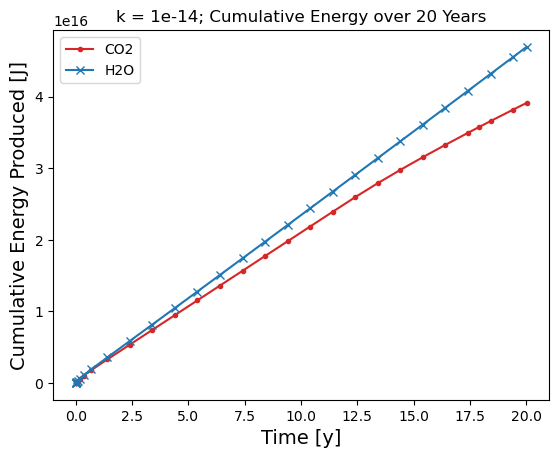

In [31]:
plt.plot(k_CO2_1em14["Time [y]"], k_CO2_1em14["Cumulative Energy Produced"],'C3', marker=".", linestyle ='-', label='CO2')
plt.plot(k_H2O_1em14["Time [y]"], k_H2O_1em14["Cumulative Energy Produced"],'C0', marker="x", linestyle ='-', label='H2O')
plt.title("k = 1e-14; Cumulative Energy over 20 Years")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Energy Produced [J]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case10/Case10_cum_energy_k_1em14.png')

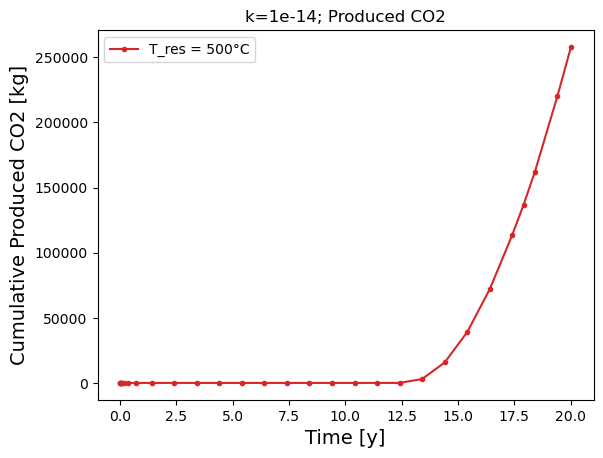

In [32]:
plt.plot(k_CO2_1em14["Time [y]"], k_CO2_1em14["Cumulative Produced CO2"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-14; Produced CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Produced CO2 [kg]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case10/Case10_co2_production_k_1em14.png')

In [33]:
# Mass of injected CO2 at 6kg/s CO2 mass flux

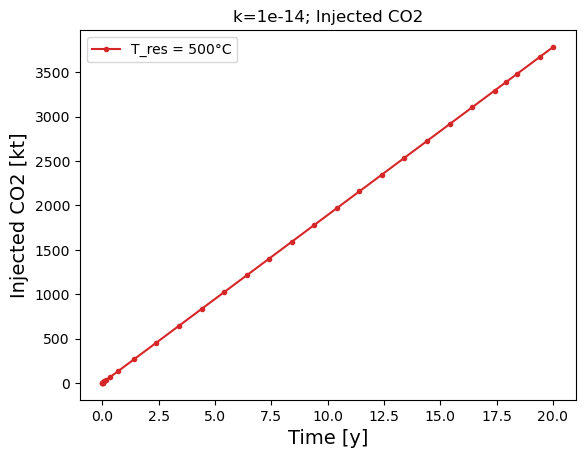

In [34]:
plt.plot(k_CO2_1em14["Time [y]"], k_CO2_1em14["Injected CO2 [kt]"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-14; Injected CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Injected CO2 [kt]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case10/Case10_co2_injection_k_1em14.png')

In [35]:
#Stored CO2 in kt at mass flux CO2 6kg/s 

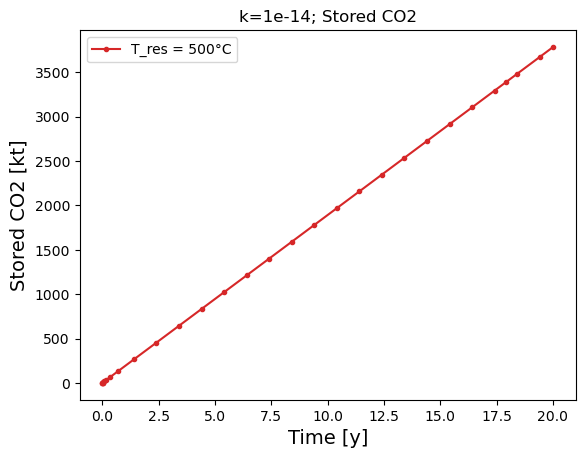

In [36]:
plt.plot(k_CO2_1em14["Time [y]"], k_CO2_1em14["Stored CO2 [kt]"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-14; Stored CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Stored CO2 [kt]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case10/Case10_co2_stored_k_1em14.png')